In [2]:
%autosave 0
import scipy
import numpy 
import matplotlib
import pandas as pd
import numpy as np 
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix 
from numpy import set_printoptions 
set_printoptions(precision=0)
pd.set_option("display.precision", 2)
pd.option_context('display.float_format', '{:0f}'.format);

Autosave disabled


In [2]:
# Importation du fichier csv dans un dataframe
df_train_full = read_csv( './dataset-template.csv')
#df_train_full = read_csv( './csv/realstate-data.csv' )

In [3]:
# peek
df_train_full.head(10)

,ref,city,county,district,area_m2,ground_m2,nb_room,nb_bedroom,pool,cellar,garage,output
0,654a-123,Bordeaux,33,Nouvelle Aquitaine,47,47,1,0,0,0,0,120000
1,654a-124,Bègles,33,Nouvelle Aquitaine,54,54,2,1,0,1,0,130000
2,654a-125,Bordeaux,33,Nouvelle Aquitaine,38,38,1,0,0,1,1,75000
3,654a-126,Bordeaux,33,Nouvelle Aquitaine,42,42,1,0,0,0,0,89000
4,654a-127,Mérignac,33,Nouvelle Aquitaine,71,71,3,2,0,0,0,220000
5,654a-128,Bayonne,64,Nouvelle Aquitaine,75,75,4,2,1,1,0,180000
6,654a-129,Mérignac,33,Nouvelle Aquitaine,44,44,1,0,0,1,1,94000
7,654a-130,Bègles,33,Nouvelle Aquitaine,42,42,2,1,0,0,0,107000


In [4]:
# description
df_train_full.describe() 

,county,area_m2,ground_m2,nb_room,nb_bedroom,pool,cellar,garage,output
count,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,36.88,51.62,51.62,1.88,0.75,0.12,0.50,0.25,126875.00
std,10.96,14.03,14.03,1.13,0.89,0.35,0.53,0.46,49501.62
min,33.00,38.00,38.00,1.00,0.00,0.00,0.00,0.00,75000.00
25%,33.00,42.00,42.00,1.00,0.00,0.00,0.00,0.00,92750.00
50%,33.00,45.50,45.50,1.50,0.50,0.00,0.50,0.00,113500.00
75%,33.00,58.25,58.25,2.25,1.25,0.00,1.00,0.25,142500.00
max,64.00,75.00,75.00,4.00,2.00,1.00,1.00,1.00,220000.00


In [5]:
# effectif des classes
df_train_full.groupby('city').size() 

city
Bayonne     1
Bordeaux    3
Bègles      2
Mérignac    2
dtype: int64

In [6]:
# corrélation
correlations = df_train_full.corr(method='pearson') 
print(correlations)

            county  area_m2  ground_m2  nb_room  nb_bedroom  pool  cellar  \
county        1.00     0.67       0.67     0.76        0.57  1.00    0.38   
area_m2       0.67     1.00       1.00     0.92        0.90  0.67    0.09   
ground_m2     0.67     1.00       1.00     0.92        0.90  0.67    0.09   
nb_room       0.76     0.92       0.92     1.00        0.97  0.76    0.12   
nb_bedroom    0.57     0.90       0.90     0.97        1.00  0.57    0.00   
pool          1.00     0.67       0.67     0.76        0.57  1.00    0.38   
cellar        0.38     0.09       0.09     0.12        0.00  0.38    1.00   
garage       -0.22    -0.47      -0.47    -0.48       -0.52 -0.22    0.58   
output        0.43     0.95       0.95     0.84        0.90  0.43   -0.15   

            garage  output  
county       -0.22    0.43  
area_m2      -0.47    0.95  
ground_m2    -0.47    0.95  
nb_room      -0.48    0.84  
nb_bedroom   -0.52    0.90  
pool         -0.22    0.43  
cellar        0.58   -0.15

In [7]:
# erreur
skew = df_train_full.skew() 
print(skew)

county        2.83
area_m2       1.05
ground_m2     1.05
nb_room       1.11
nb_bedroom    0.62
pool          2.83
cellar        0.00
garage        1.44
output        1.13
dtype: float64


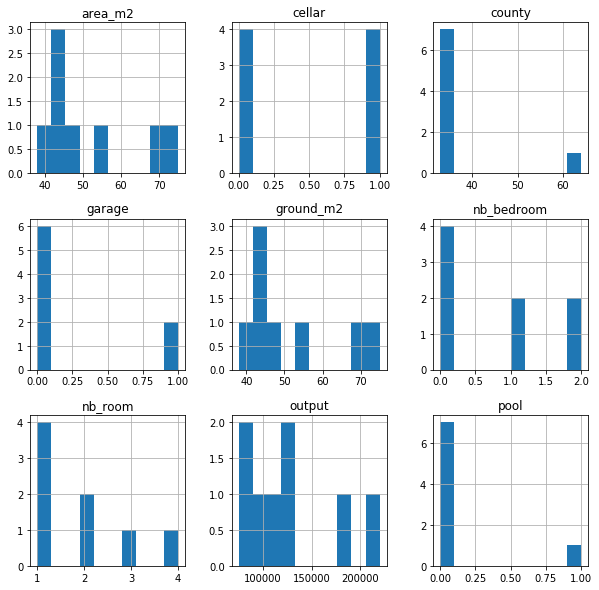

In [8]:
# histogramme
df_train_full.hist(figsize=(10,10))
pyplot.show()

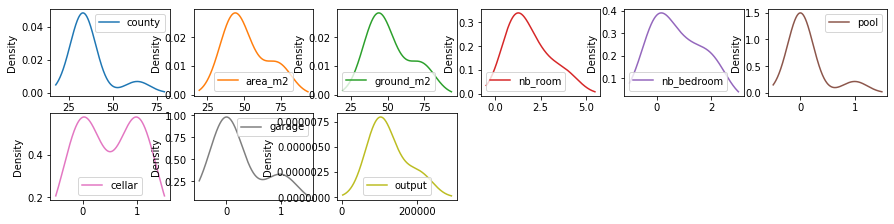

In [9]:
# density plot
df_train_full.plot(kind='density', subplots=True, layout=(8,6), sharex=False, figsize=(15,15)) 
pyplot.show()

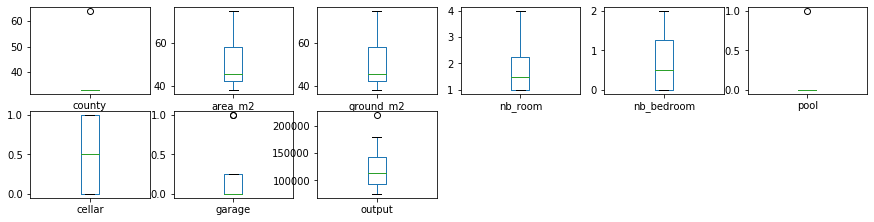

In [10]:
# boxplot
df_train_full.plot(kind='box', subplots=True, layout=(8,6), sharex=False, sharey=False, figsize=(15,15)) 
pyplot.show()

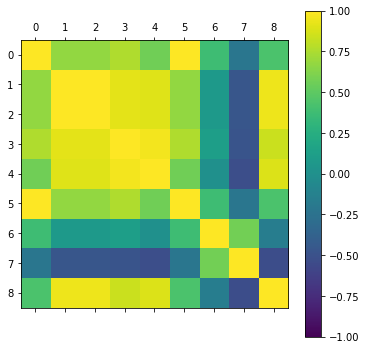

In [13]:
# correlation matrix
correlations = df_train_full.corr() 
fig = pyplot.figure(figsize=(6,6)) 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
pyplot.show()

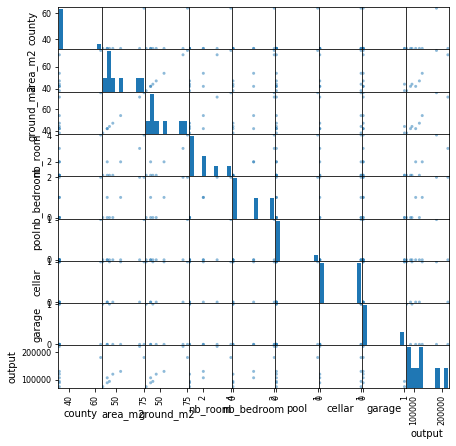

In [15]:
# nuage de point
scatter_matrix(df_train_full, figsize=(7,7)) 
pyplot.show()